Importação de modulos e arquivos

In [5]:
import pandas as pd

funcionarios_df = pd.read_csv("CadastroFuncionarios.csv", sep=";", decimal= ",")
cliente_df = pd.read_csv("CadastroClientes.csv", sep=";", decimal= ",")
servicos_df = pd.read_excel("BaseServiçosPrestados.xlsx")

# Retirar colunas Estado CIvil e Cargo da Tabela Funcionarios
funcionarios_df = funcionarios_df.drop(["Estado Civil", "Cargo"], axis=1)


display(funcionarios_df)
display(cliente_df)
display(servicos_df)



,ID Funcionário,Nome Completo,Salario Base,Impostos,Beneficios,VT,VR,Area
0,1,Gabriel Mesquita,21910,10955.0,4382.0,242,719.04,Operações
1,2,João Haddad,5404,2702.0,1080.8,154,574.56,Logística
2,3,Amanda Marques Ribeiro,16066,8033.0,3213.2,154,729.12,Administrativo
3,4,Guilherme Nunez,21305,10652.5,4261.0,220,524.16,Administrativo
4,5,Adelino Gomes,5098,2549.0,1019.6,176,725.76,Administrativo
...,...,...,...,...,...,...,...,...
109,143,Renan Scharnhorst Ott,10793,5396.5,2158.6,242,514.08,Logística
110,144,Lucas Brum Pereira,4048,2024.0,809.6,198,796.32,Comercial
111,148,Caio Stellet,24596,12298.0,4919.2,242,561.12,Administrativo
112,149,Fernanda Rocha,5078,2539.0,1015.6,308,665.28,Comercial


,ID Cliente,Cliente,Valor Contrato Mensal
0,1,Teixeira Gonçalves,540
1,2,Souza Santos,1260
2,3,Emídio Alves,3195
3,4,Santos Costa,2520
4,5,Do Monteiro,3510
...,...,...,...
315,316,Manoel Costa,3690
316,317,Gomes Machado,2385
317,318,Alkindar Cardozo,3510
318,319,Pereira Fazenda,4185


,Codigo do Servico,ID Funcionário,ID Cliente,Tempo Total de Contrato (Meses)
0,OS0001,67,1,14
1,OS0002,17,2,12
2,OS0003,116,4,14
3,OS0004,37,5,8
4,OS0005,130,6,8
...,...,...,...,...
232,OS0233,111,315,4
233,OS0234,124,316,8
234,OS0235,72,317,6
235,OS0236,90,319,14


1 - Folha Salarial

In [6]:
funcionarios_df["salario_total"] = funcionarios_df["Salario Base"] + funcionarios_df["Impostos"] + funcionarios_df["Beneficios"] + funcionarios_df["VR"]
total = funcionarios_df["salario_total"].sum()
display(f"Folha salarial: {total: ,.2f}")

'Folha salarial:  2,690,521.22'

2 - Faturamento da Empresa

In [7]:
faturamentos_df = servicos_df[["ID Cliente","Tempo Total de Contrato (Meses)"]].merge(cliente_df[["ID Cliente", "Valor Contrato Mensal"]], on= "ID Cliente")
faturamentos_df["Faturamento Total"] = faturamentos_df["Tempo Total de Contrato (Meses)"] * faturamentos_df["Valor Contrato Mensal"]
total = faturamentos_df["Faturamento Total"].sum()
print(f"Faturamento total: R$ {total:,.2f}")

Faturamento total: R$ 5,519,160.00


3 - % Funcionarios Fecharam Contrato

In [8]:
qtde_funcionarios_fecharam = len(servicos_df['ID Funcionário'].unique())
qtde_funcionarios_totais = len(funcionarios_df['ID Funcionário'])
resultado = qtde_funcionarios_fecharam / qtde_funcionarios_totais

print(f"Do total de {qtde_funcionarios_totais} funcionários, {qtde_funcionarios_fecharam} fecharam contratos, "
      f"o que representa {resultado:.2%} do quadro total.")

Do total de 114 funcionários, 99 fecharam contratos, o que representa 86.84% do quadro total.


4 -Total de Contratos por Área

Area
Administrativo    63
Operações         48
Comercial         44
Financeiro        42
Logística         40
Name: count, dtype: int64


<Axes: xlabel='Area'>

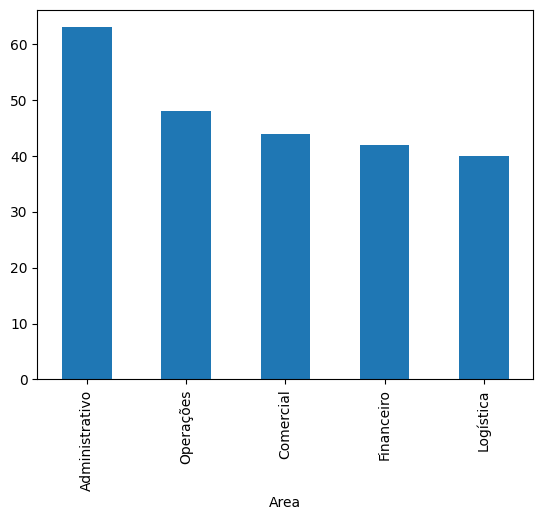

In [9]:
contratos_area_df = servicos_df[['ID Funcionário']].merge(funcionarios_df[['ID Funcionário', 'Area']])
#display(contratos_area_df)
qtde_contratos_area = contratos_area_df['Area'].value_counts()
print(qtde_contratos_area)
qtde_contratos_area.plot(kind='bar')

5- Total Funcionarios por Área

Area
Administrativo    26
Comercial         26
Operações         23
Logística         21
Financeiro        18
Name: count, dtype: int64


<Axes: xlabel='Area'>

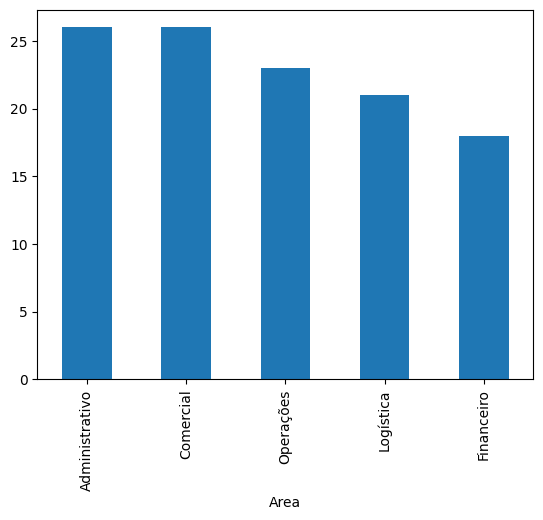

In [10]:
qtde_funcionarios_area = funcionarios_df['Area'].value_counts()
print(qtde_funcionarios_area)
qtde_funcionarios_area.plot(kind='bar')

6 - Ticket Médio Mensal

In [11]:
# Calcular o ticket médio
ticket_medio = cliente_df['Valor Contrato Mensal'].mean()
print(f'O ticket médio mensal é de R${ticket_medio:.2f}')

O ticket médio mensal é de R$2502.56
